# Importing and installing libs

In [ ]:
%%capture
!pip install gensim==3.6

In [1]:
# Utilities
import re
import pickle
import numpy as np
import pandas as pd

# Plot libraries
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Processing 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

#Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc

#Build the model
from gensim.models import Word2Vec
import gensim
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


0 - negative |
1 - positive

In [ ]:
lb = LabelEncoder()

In [2]:
sentences = pd.read_csv('/content/drive/MyDrive/Data Augmentation/LACIAM/data/all_sentences.csv')
sentences = sentences.rename(columns={'0': 'sentiment', '5': 'original text', 'processed_text': 'processed text'})
sentences.head()

sentiment                                      original text  \
0  negative                             @FaketragedyCom i know   
1  negative         I.....want to.......go........home........   
2  negative                          @cathicks I don't get it.   
3  negative  http://vibejournal.com/jessica_art/ needs a ne...   
4  negative                                           grounded   

           processed text  max changes augmentation type  \
0           <user> i know            0         Insertion   
1    i  want to  go  home            0         Insertion   
2  <user> i do not get it            0              Swap   
3  <url> needs a new home            0              Swap   
4                grounded            0              Swap   

                  results  
0           <user> i know  
1    i  want to  go  home  
2  <user> i do not get it  
3  <url> needs a new home  
4                grounded

In [4]:
sentences.isna().sum()

sentiment              0
original text          0
processed text         0
max changes            0
augmentation type      0
results              140
dtype: int64

In [5]:
sentences = sentences.dropna().reset_index()

In [6]:
sentences = sentences.drop(['index'], axis=1)

In [ ]:
print(sentences['augmentation type'].value_counts())
print('\n', sentences['augmentation type'].value_counts(normalize=True)*100)

Synonym Replacement    104
Swap                    87
Deletion                87
Insertion               82
Name: augmentation type, dtype: int64

 Synonym Replacement    28.888889
Swap                   24.166667
Deletion               24.166667
Insertion              22.777778
Name: augmentation type, dtype: float64


In [7]:
print(sentences['sentiment'].value_counts())
print('\n', sentences['sentiment'].value_counts(normalize=True)*100)

negative    182
positive    178
Name: sentiment, dtype: int64

 negative    50.555556
positive    49.444444
Name: sentiment, dtype: float64


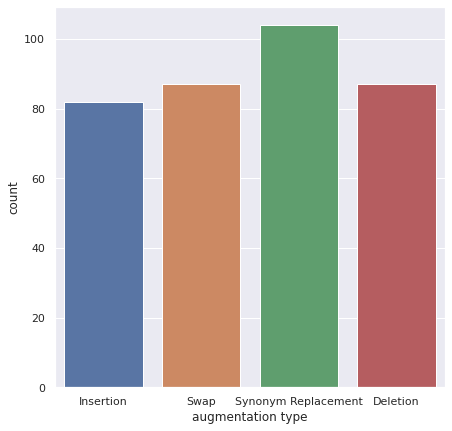

In [ ]:
sns.countplot(x=sentences['augmentation type'])

In [ ]:
df = pd.DataFrame()

sentence = []
sentiment = []

for x, y in enumerate(sentences['processed text']):
  sentence.append(y)
  sentiment.append(sentences['sentiment'][x])

for x, y in enumerate(sentences['results']):
  results = y.split('||')
  label = sentences['sentiment'][x]
  for tweet in results:
    sentence.append(tweet)
    sentiment.append(label)

df['sentences'] = sentence
df['label'] = sentiment

In [ ]:
df.to_csv('/content/drive/MyDrive/Data Augmentation/LACIAM/data/data_complete.csv')

In [ ]:
df['label'].value_counts()

negative    736
positive    716
Name: label, dtype: int64

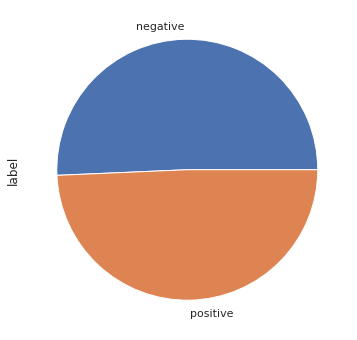

In [ ]:
df['label'].value_counts().plot.pie(y='Sentiments', figsize=(6, 6))

# EDA

In [ ]:
eda_df = sentences[['sentiment', 'processed text']]

In [ ]:
%%capture
eda_df['sentiment'] = lb.fit_transform(eda_df['sentiment'])

In [ ]:
eda_df.to_csv('/content/drive/MyDrive/Data Augmentation/LACIAM/data/eda_input.txt', sep='\t')

In [2]:
aug_df = pd.read_csv('/content/drive/MyDrive/Data Augmentation/LACIAM/data/eda_dataset_augmented.txt', sep='\t', names=['label', 'sentence'])
aug_df.head()

label            sentence
0      0    user i recognize
1      0          user i bed
2      0         know i user
3      0  user i iodine know
4      0    exploiter i know

In [3]:
aug_df

label                                           sentence
0         0                                   user i recognize
1         0                                         user i bed
2         0                                        know i user
3         0                                 user i iodine know
4         0                                   exploiter i know
...     ...                                                ...
6115      1  found user fingers alike crossed and all the b...
6116      1  substance abuser thumb crossed and all the out...
6117      1  user fingers crossed and all the sound best to...
6118      1  atomic number iodine user fingers crossed and ...
6119      1  user fingers crossed and all the best to you l...

[6120 rows x 2 columns]

In [5]:
print(aug_df['label'].value_counts())
print(aug_df['label'].value_counts(normalize=True))

0    3094
1    3026
Name: label, dtype: int64
0    0.505556
1    0.494444
Name: label, dtype: float64


# Wordclouds

In [ ]:
# all_df_positive = df.loc[df['label'] == 'positive']
# all_df_negative = df.loc[df['label'] == 'negative']

# df_positive = sentences.loc[sentences['sentiment'] == 'positive']
# df_negative = sentences.loc[sentences['sentiment'] == 'negative']

EDA_df_positive = aug_df.loc[aug_df['label'] == 1]
EDA_df_negative = aug_df.loc[aug_df['label'] == 0]

In [ ]:
stopwords_list = stopwords.words('english')
stopwords_list.append('user')
stopwords_list.append('url')

## positive words

small df

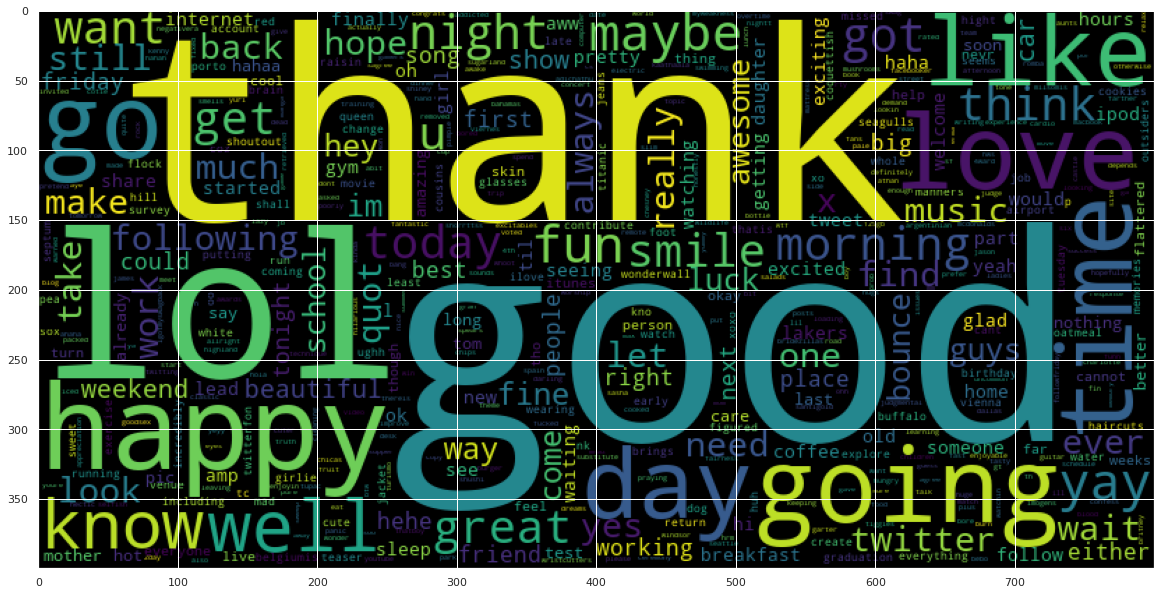

In [ ]:
wc = WordCloud(max_words = 500 , width = 800 , height = 400, stopwords=stopwords_list,
              collocations=False).generate(" ".join(df_positive['processed text']))
plt.figure(figsize = (20,20))
plt.imshow(wc)

complete df

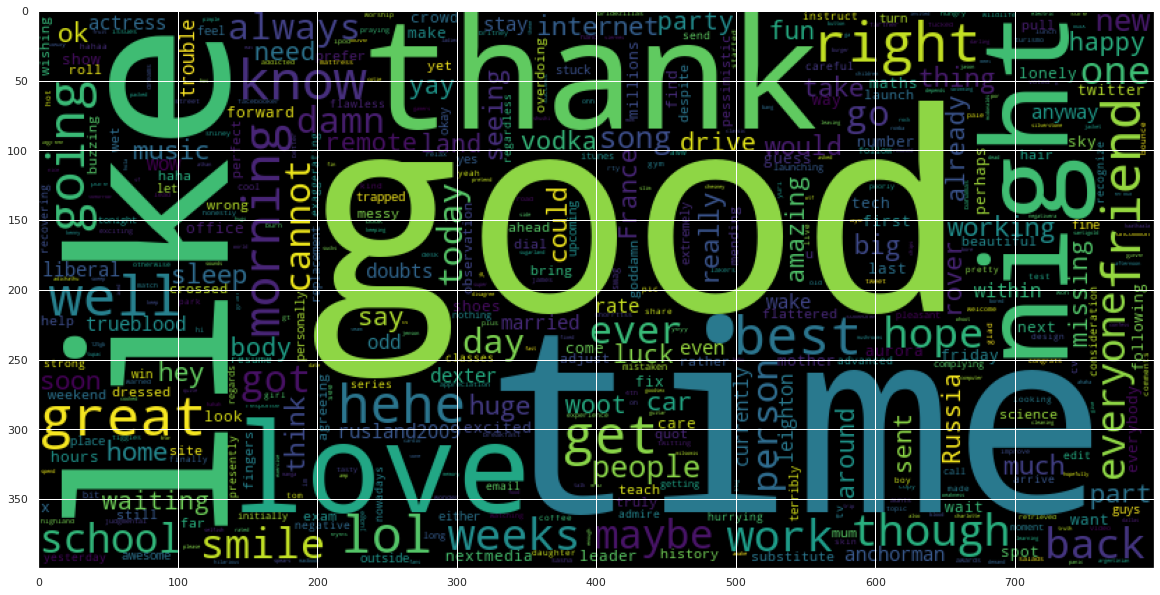

In [ ]:
wc = WordCloud(max_words = 500 , width = 800 , height = 400, stopwords=stopwords_list,
              collocations=False).generate(" ".join(all_df_positive['sentences']))
plt.figure(figsize = (20,20))
plt.imshow(wc)

eda df

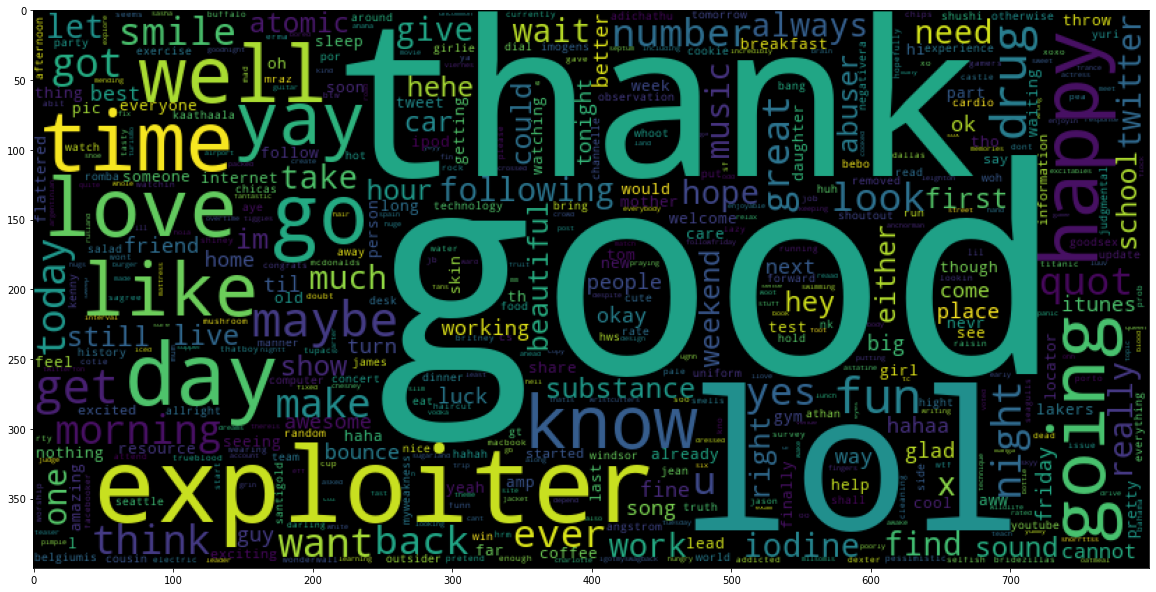

In [ ]:
wc = WordCloud(max_words = 500 , width = 800 , height = 400, stopwords=stopwords_list,
              collocations=False).generate(" ".join(EDA_df_positive['sentence']))
plt.figure(figsize = (20,20))
plt.imshow(wc)

## negative words

## negative words

small df

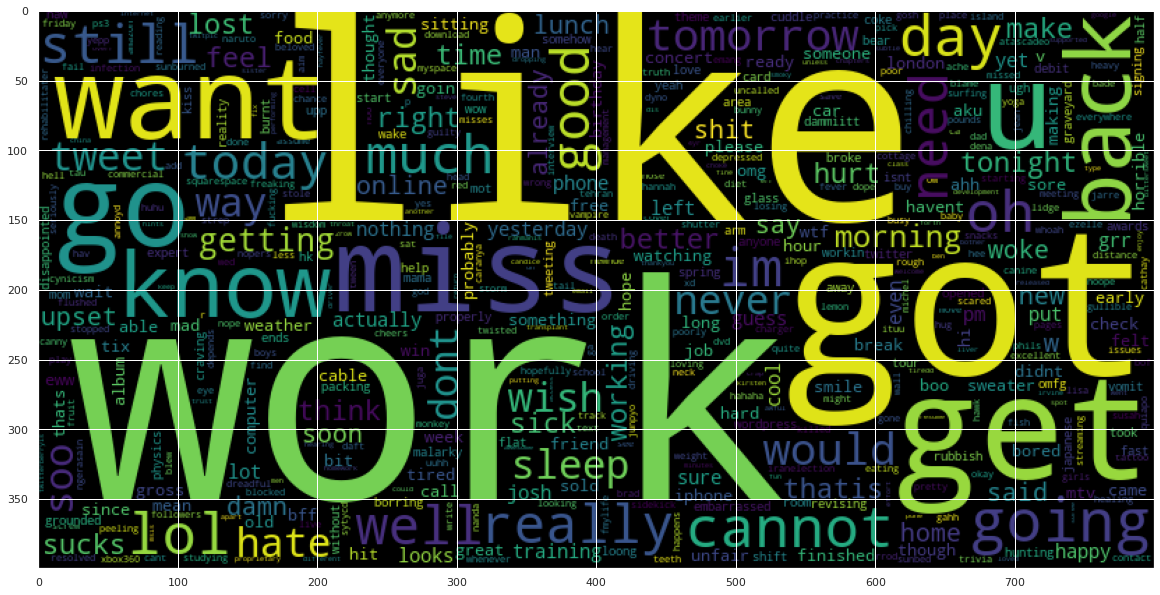

In [ ]:
wc = WordCloud(max_words = 500 , width = 800 , height = 400, stopwords=stopwords_list,
              collocations=False).generate(" ".join(df_negative['processed text']))
plt.figure(figsize = (20,20))
plt.imshow(wc)

complete df

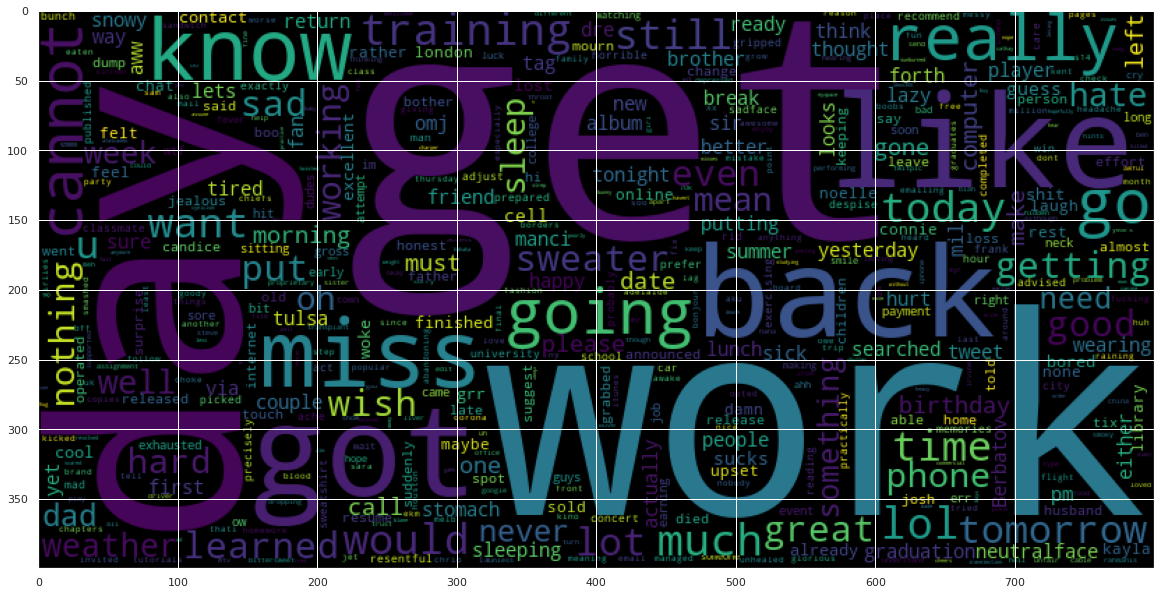

In [ ]:
wc = WordCloud(max_words = 500 , width = 800 , height = 400, stopwords=stopwords_list,
              collocations=False).generate(" ".join(all_df_negative['sentences']))
plt.figure(figsize = (20,20))
plt.imshow(wc)

eda df

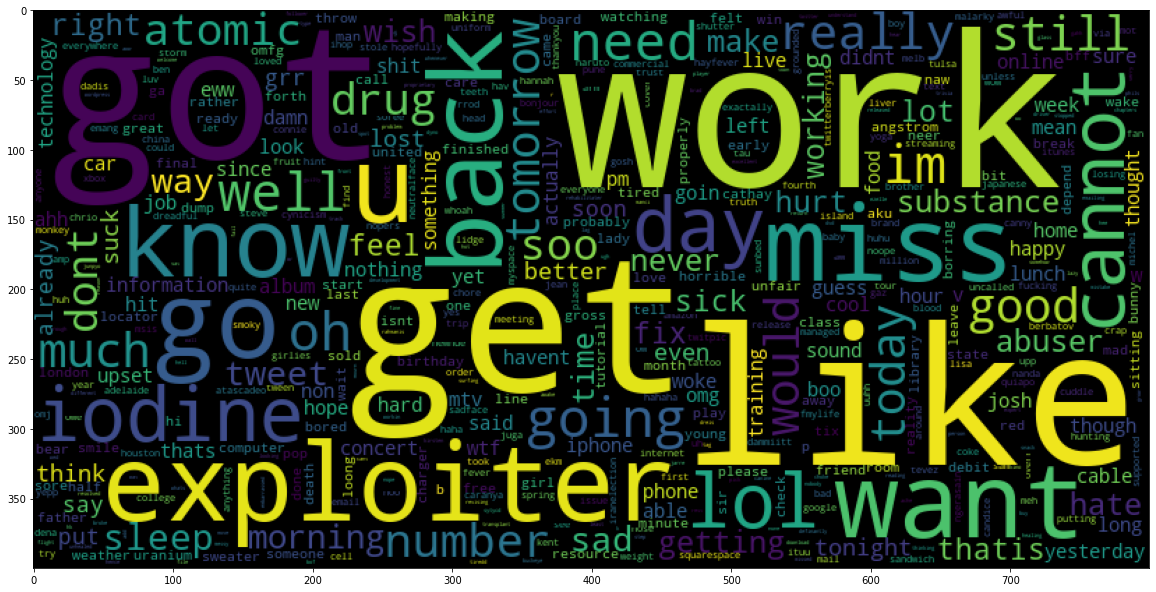

In [ ]:
wc = WordCloud(max_words = 500 , width = 800 , height = 400, stopwords=stopwords_list,
              collocations=False).generate(" ".join(EDA_df_negative['sentence']))
plt.figure(figsize = (20,20))
plt.imshow(wc)

# RNN LSTM

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Augmentation/LACIAM/data/data_complete.csv')

In [ ]:
X_data_small, y_data_small = np.array(sentences['processed text']), lb.fit_transform(np.array(sentences['sentiment']))
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_data_small, y_data_small, test_size = 0.1, random_state = 0)

X_data_complete, y_data_complete = np.array(df['sentences']), lb.fit_transform(np.array(df['label']))
X_train_complete, X_test_complete, y_train_complete, y_test_complete = train_test_split(X_data_complete, y_data_complete, test_size = 0.1, random_state = 0)

X_data_EDA, y_data_EDA = np.array(aug_df['sentence']), lb.fit_transform(np.array(aug_df['label']))
X_train_EDA, X_test_EDA, y_train_EDA, y_test_EDA = train_test_split(X_data_EDA, y_data_EDA, test_size = 0.1, random_state = 0)

print('Data Split done.')

Data Split done.


## Small

In [ ]:
Embedding_dimensions = 100

# Creating Word2Vec training dataset.
Word2vec_train_data_small = list(map(lambda x: x.split(), X_train_small))

In [ ]:
%%time

# Defining the model and training it.
word2vec_model_small = Word2Vec(Word2vec_train_data_small,
                 size=Embedding_dimensions,
                 workers=8,
                 min_count=5)

print("Vocabulary Length (small):", len(word2vec_model_small.wv.vocab))

Vocabulary Length (small): 127
CPU times: user 43.4 ms, sys: 5.26 ms, total: 48.7 ms
Wall time: 49.8 ms


In [ ]:
input_length = 60
vocab_length = 300

tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(X_data_small)
tokenizer.num_words = vocab_length
print("Tokenizer vocab length:", vocab_length)

Tokenizer vocab length: 300


In [ ]:
X_train_small = pad_sequences(tokenizer.texts_to_sequences(X_train_small), maxlen=input_length)
X_test_small  = pad_sequences(tokenizer.texts_to_sequences(X_test_small) , maxlen=input_length)

print("X_train_small.shape:", X_train_small.shape)
print("X_test_small.shape :", X_test_small.shape)

X_train_small.shape: (324, 60)
X_test_small.shape : (36, 60)


In [ ]:
embedding_matrix = np.zeros((vocab_length, Embedding_dimensions))

for word, token in tokenizer.word_index.items():
    if word2vec_model_small.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model_small.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (300, 100)


In [ ]:
def getModel():
    embedding_layer = Embedding(input_dim = vocab_length,
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix],
                                input_length=input_length,
                                trainable=False)

    model = Sequential([
        embedding_layer,
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Conv1D(100, 5, activation='relu'),
        GlobalMaxPool1D(),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid'),
    ],
    name="Sentiment_Model")
    return model

In [ ]:
training_model = getModel()
training_model.summary()

Model: "Sentiment_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 100)           30000     
                                                                 
 bidirectional (Bidirectiona  (None, 60, 200)          160800    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 60, 200)          240800    
 nal)                                                            
                                                                 
 conv1d (Conv1D)             (None, 56, 100)           100100    
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                   

In [ ]:
callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
             EarlyStopping(monitor='val_accuracy', min_delta=1e-2, patience=5)]

In [ ]:
training_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = training_model.fit(
    X_train_small, y_train_small,
    batch_size=64,
    epochs=12,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1,
)

Epoch 1/12
5/5 [==============================] - 10s 430ms/step - loss: 0.6938 - accuracy: 0.4467 - val_loss: 0.6925 - val_accuracy: 0.6061 - lr: 0.0010
Epoch 2/12
5/5 [==============================] - 0s 28ms/step - loss: 0.6934 - accuracy: 0.4983 - val_loss: 0.6911 - val_accuracy: 0.6061 - lr: 0.0010
Epoch 3/12
5/5 [==============================] - 0s 27ms/step - loss: 0.6934 - accuracy: 0.4674 - val_loss: 0.6927 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 4/12
5/5 [==============================] - 0s 24ms/step - loss: 0.6931 - accuracy: 0.5017 - val_loss: 0.6945 - val_accuracy: 0.3939 - lr: 0.0010
Epoch 5/12
5/5 [==============================] - 0s 24ms/step - loss: 0.6934 - accuracy: 0.5155 - val_loss: 0.6930 - val_accuracy: 0.5152 - lr: 0.0010
Epoch 6/12
5/5 [==============================] - 0s 25ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6922 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 7/12
5/5 [==============================] - 0s 26ms/step - loss: 0.6930 - accura

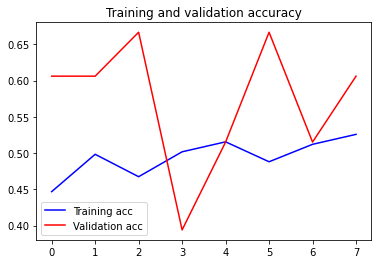

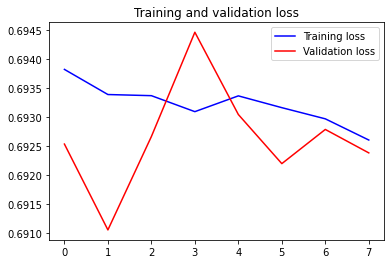

In [ ]:
acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
def ConfusionMatrix(y_pred, y_test):
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

2/2 [==============================] - 2s 49ms/step


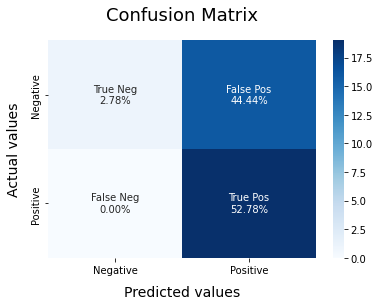

In [ ]:
# Predicting on the Test dataset.
y_pred = training_model.predict(X_test_small)

# Converting prediction to reflect the sentiment predicted.
y_pred = np.where(y_pred>=0.5, 1, 0)

# Printing out the Evaluation metrics. 
ConfusionMatrix(y_pred, y_test_small)

In [ ]:
print(classification_report(y_test_small, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.06      0.11        17
           1       0.54      1.00      0.70        19

    accuracy                           0.56        36
   macro avg       0.77      0.53      0.41        36
weighted avg       0.76      0.56      0.42        36



## EDA

In [ ]:
Embedding_dimensions = 100

# Creating Word2Vec training dataset.
Word2vec_train_data_EDA = list(map(lambda x: x.split(), X_train_EDA))

In [ ]:
%%time

# Defining the model and training it.
word2vec_model_EDA = Word2Vec(Word2vec_train_data_EDA,
                 size=Embedding_dimensions,
                 workers=8,
                 min_count=5)

print("Vocabulary Length (EDA):", len(word2vec_model_EDA.wv.vocab))

Vocabulary Length (EDA): 1473
CPU times: user 1.24 s, sys: 13.8 ms, total: 1.26 s
Wall time: 1.5 s


In [ ]:
input_length = 60
vocab_length = 6000

tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(X_data_EDA)
tokenizer.num_words = vocab_length
print("Tokenizer vocab length:", vocab_length)

Tokenizer vocab length: 6000


In [ ]:
X_train_EDA = pad_sequences(tokenizer.texts_to_sequences(X_train_EDA), maxlen=input_length)
X_test_EDA  = pad_sequences(tokenizer.texts_to_sequences(X_test_EDA) , maxlen=input_length)

print("X_train_EDA.shape:", X_train_EDA.shape)
print("X_test_EDA.shape :", X_test_EDA.shape)

X_train_EDA.shape: (5508, 60)
X_test_EDA.shape : (612, 60)


In [ ]:
embedding_matrix = np.zeros((vocab_length, Embedding_dimensions))

for word, token in tokenizer.word_index.items():
    if word2vec_model_EDA.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model_EDA.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (6000, 100)


In [ ]:
def getModel():
    embedding_layer = Embedding(input_dim = vocab_length,
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix],
                                input_length=input_length,
                                trainable=False)

    model = Sequential([
        embedding_layer,
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Conv1D(100, 5, activation='relu'),
        GlobalMaxPool1D(),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid'),
    ],
    name="Sentiment_Model")
    return model

In [ ]:
training_model = getModel()
training_model.summary()

Model: "Sentiment_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 100)           600000    
                                                                 
 bidirectional (Bidirectiona  (None, 60, 200)          160800    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 60, 200)          240800    
 nal)                                                            
                                                                 
 conv1d (Conv1D)             (None, 56, 100)           100100    
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                   

In [ ]:
callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
             EarlyStopping(monitor='val_accuracy', min_delta=1e-2, patience=5)]

In [ ]:
training_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = training_model.fit(
    X_train_EDA, y_train_EDA,
    batch_size=64,
    epochs=12,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1,
)

Epoch 1/12
78/78 [==============================] - 60s 656ms/step - loss: 0.6912 - accuracy: 0.5257 - val_loss: 0.6782 - val_accuracy: 0.5735 - lr: 0.0010
Epoch 2/12
78/78 [==============================] - 39s 499ms/step - loss: 0.6920 - accuracy: 0.5261 - val_loss: 0.6799 - val_accuracy: 0.5862 - lr: 0.0010
Epoch 3/12
78/78 [==============================] - 42s 534ms/step - loss: 0.6901 - accuracy: 0.5294 - val_loss: 0.6812 - val_accuracy: 0.5771 - lr: 0.0010
Epoch 4/12
78/78 [==============================] - 40s 511ms/step - loss: 0.6888 - accuracy: 0.5380 - val_loss: 0.6814 - val_accuracy: 0.5681 - lr: 0.0010
Epoch 5/12
78/78 [==============================] - 40s 507ms/step - loss: 0.6882 - accuracy: 0.5453 - val_loss: 0.6739 - val_accuracy: 0.6044 - lr: 0.0010
Epoch 6/12
78/78 [==============================] - 40s 513ms/step - loss: 0.6886 - accuracy: 0.5360 - val_loss: 0.6843 - val_accuracy: 0.5935 - lr: 0.0010
Epoch 7/12
78/78 [==============================] - 41s 528ms/st

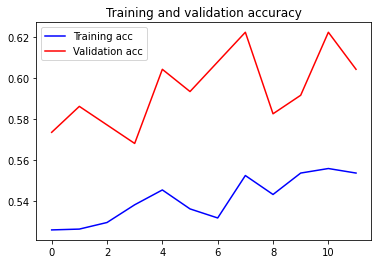

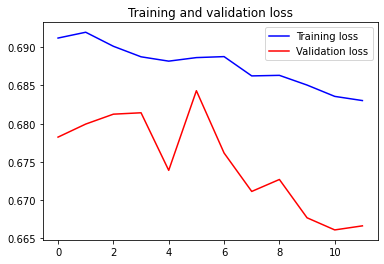

In [ ]:
acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
def ConfusionMatrix(y_pred, y_test):
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

20/20 [==============================] - 4s 81ms/step


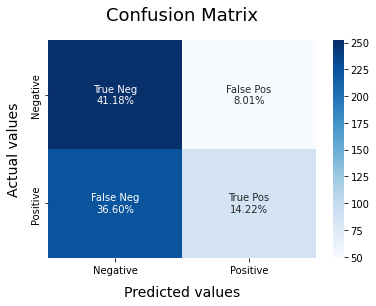

In [ ]:
# Predicting on the Test dataset.
y_pred = training_model.predict(X_test_EDA)

# Converting prediction to reflect the sentiment predicted.
y_pred = np.where(y_pred>=0.5, 1, 0)

# Printing out the Evaluation metrics. 
ConfusionMatrix(y_pred, y_test_EDA)

In [ ]:
print(classification_report(y_test_EDA, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.63      0.65        76
           1       0.63      0.67      0.65        70

    accuracy                           0.65       146
   macro avg       0.65      0.65      0.65       146
weighted avg       0.65      0.65      0.65       146



## Complete

In [ ]:
Embedding_dimensions = 100

# Creating Word2Vec training dataset.
Word2vec_train_data_complete = list(map(lambda x: x.split(), X_train_complete))

In [ ]:
%%time

# Defining the model and training it.
word2vec_model_complete = Word2Vec(Word2vec_train_data_complete,
                 size=Embedding_dimensions,
                 workers=8,
                 min_count=5)

print("Vocabulary Length (complete):", len(word2vec_model_complete.wv.vocab))

Vocabulary Length (complete): 635
CPU times: user 211 ms, sys: 7.81 ms, total: 219 ms
Wall time: 179 ms


In [ ]:
input_length = 60
vocab_length = 700

tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(X_data_complete)
tokenizer.num_words = vocab_length
print("Tokenizer vocab length:", vocab_length)

Tokenizer vocab length: 700


In [ ]:
X_train_complete = pad_sequences(tokenizer.texts_to_sequences(X_train_complete), maxlen=input_length)
X_test_complete  = pad_sequences(tokenizer.texts_to_sequences(X_test_complete) , maxlen=input_length)

print("X_train_complete.shape:", X_train_complete.shape)
print("X_test_complete.shape :", X_test_complete.shape)

X_train_complete.shape: (1306, 60)
X_test_complete.shape : (146, 60)


In [ ]:
embedding_matrix = np.zeros((vocab_length, Embedding_dimensions))

for word, token in tokenizer.word_index.items():
    if word2vec_model_complete.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model_complete.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (700, 100)


In [ ]:
def getModel():
    embedding_layer = Embedding(input_dim = vocab_length,
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix],
                                input_length=input_length,
                                trainable=False)

    model = Sequential([
        embedding_layer,
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Conv1D(100, 5, activation='relu'),
        GlobalMaxPool1D(),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid'),
    ],
    name="Sentiment_Model")
    return model

In [ ]:
training_model = getModel()
training_model.summary()

Model: "Sentiment_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 60, 100)           70000     
                                                                 
 bidirectional_22 (Bidirecti  (None, 60, 200)          160800    
 onal)                                                           
                                                                 
 bidirectional_23 (Bidirecti  (None, 60, 200)          240800    
 onal)                                                           
                                                                 
 conv1d_11 (Conv1D)          (None, 56, 100)           100100    
                                                                 
 global_max_pooling1d_11 (Gl  (None, 100)              0         
 obalMaxPooling1D)                                               
                                                   

In [ ]:
callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
             EarlyStopping(monitor='val_accuracy', min_delta=1e-2, patience=5)]

In [ ]:
training_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = training_model.fit(
    X_train_complete, y_train_complete,
    batch_size=64,
    epochs=12,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1,
)

Epoch 1/12
19/19 [==============================] - 7s 101ms/step - loss: 0.6839 - accuracy: 0.5549 - val_loss: 0.6698 - val_accuracy: 0.6107 - lr: 0.0010
Epoch 2/12
19/19 [==============================] - 0s 22ms/step - loss: 0.6725 - accuracy: 0.5711 - val_loss: 0.6752 - val_accuracy: 0.6107 - lr: 0.0010
Epoch 3/12
19/19 [==============================] - 0s 22ms/step - loss: 0.6706 - accuracy: 0.5796 - val_loss: 0.6594 - val_accuracy: 0.5496 - lr: 0.0010
Epoch 4/12
19/19 [==============================] - 0s 22ms/step - loss: 0.6577 - accuracy: 0.5983 - val_loss: 0.6595 - val_accuracy: 0.6107 - lr: 0.0010
Epoch 5/12
19/19 [==============================] - 0s 23ms/step - loss: 0.6608 - accuracy: 0.5855 - val_loss: 0.6642 - val_accuracy: 0.5573 - lr: 0.0010
Epoch 6/12
19/19 [==============================] - 0s 22ms/step - loss: 0.6592 - accuracy: 0.5796 - val_loss: 0.6414 - val_accuracy: 0.6336 - lr: 0.0010
Epoch 7/12
19/19 [==============================] - 0s 22ms/step - loss: 0.

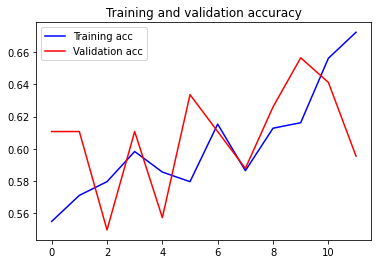

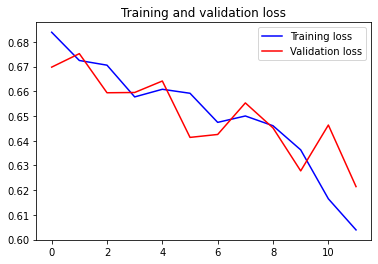

In [ ]:
acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
def ConfusionMatrix(y_pred, y_test):
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

5/5 [==============================] - 1s 10ms/step


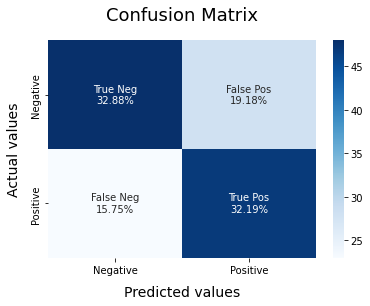

In [ ]:
# Predicting on the Test dataset.
y_pred = training_model.predict(X_test_complete)

# Converting prediction to reflect the sentiment predicted.
y_pred = np.where(y_pred>=0.5, 1, 0)

# Printing out the Evaluation metrics. 
ConfusionMatrix(y_pred, y_test_complete)

In [ ]:
print(classification_report(y_test_complete, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.63      0.65        76
           1       0.63      0.67      0.65        70

    accuracy                           0.65       146
   macro avg       0.65      0.65      0.65       146
weighted avg       0.65      0.65      0.65       146

